<a href="https://colab.research.google.com/github/Sulthana-2000/Deep-Learning/blob/main/Fashion_MNIST(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About the Dataset**

Fashion-MNIST is a dataset of of a training set of 60,000 examples and a test set of 10,000 examples.

Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Each training and test example is assigned to one of the following labels:

        0 T-shirt/top
        1 Trouser
        2 Pullover
        3 Dress
        4 Coat
        5 Sandal
        6 Shirt
        7 Sneaker
        8 Bag
        9 Ankle boot

**Objective**

To come up with a model that can predict label for each image

**Importing Librabries**

In [14]:
#for numerical analysis
import numpy as np
#to store and process in a dataframe
import pandas as pd

#for ploting graphs
import matplotlib.pyplot as plt
#advanced ploting
import seaborn as sns

#image processing
import matplotlib.image as mpimg

#train test split
from sklearn.model_selection import train_test_split
#model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

# utility functions
from tensorflow.keras.utils import to_categorical

# sequential model
from tensorflow.keras.models import Sequential

# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [30]:
# import train and test dataset
train=pd.read_csv('/content/fashion-mnist_train.csv')
test=pd.read_csv('/content/fashion-mnist_test.csv')

In [31]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
print(train.shape)

(60000, 785)


In [34]:
print(test.shape)

(10000, 785)


In [35]:
# looking for missing values
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


In [36]:
# actural item corresponding to each label
item = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

<ipython-input-41-99b21208bf3e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


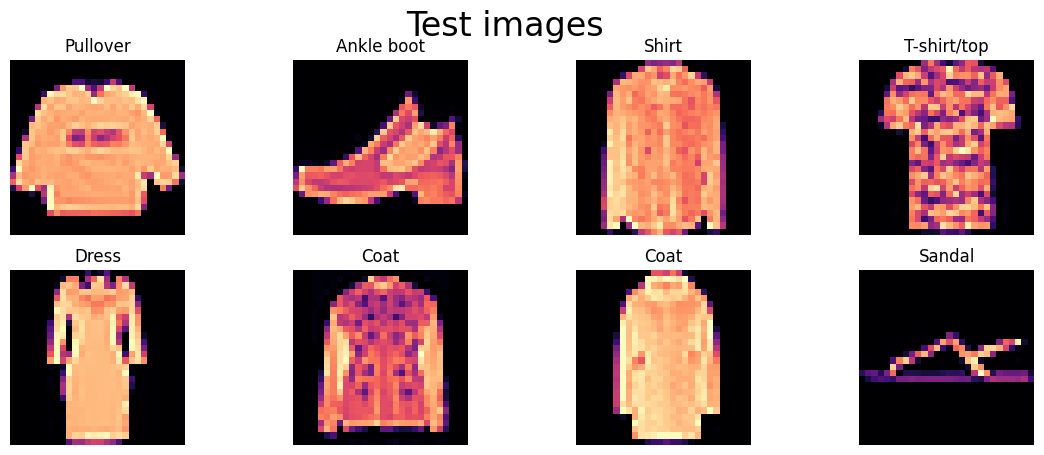

In [41]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(14, 5))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

<ipython-input-42-82cfa1bc6505>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


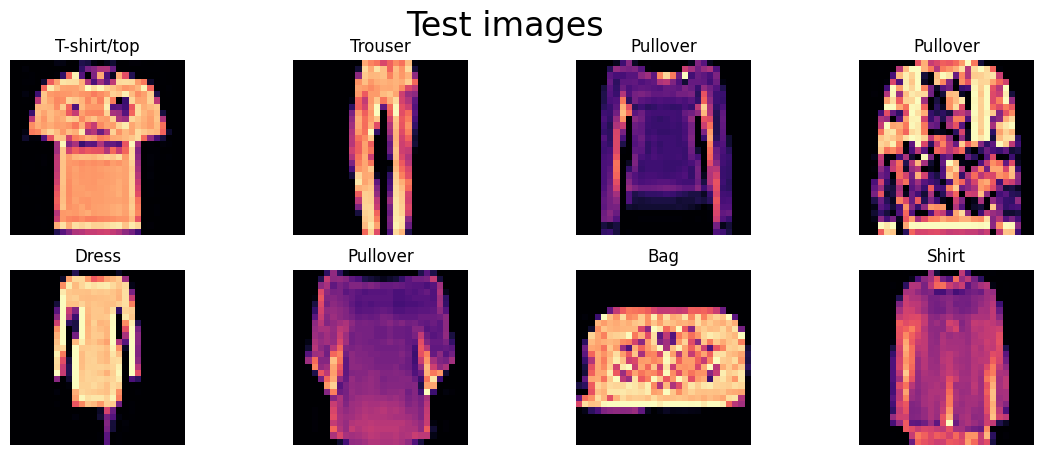

In [42]:
# first few test images with labels
fig, ax = plt.subplots(figsize=(14, 5))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

Preprocessing


In [44]:
# split into image and labels and convert to numpy array
X_train = train.iloc[:, 1:].to_numpy()
y_train = train['label'].to_numpy()

X_test = test.iloc[:, 1:].to_numpy()
y_test = test['label'].to_numpy()

for i in [X_train, y_train, X_test, y_test]:
    print(i.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Train and Test Images

In [45]:
# reshaping images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [47]:
# fix data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [48]:
# normalizing images
X_train = X_train/255.0
X_test = X_test/255.0

In [49]:
# one hot encoding targets
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

In [50]:
# shape
for i in [X_train, y_train_enc, X_test, y_test_enc]:
    print(i.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [51]:
# train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X_train, y_train_enc, test_size=0.3)
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(42000, 28, 28, 1)
(42000, 10)
(18000, 28, 28, 1)
(18000, 10)


**CNN**

Model Parameters

In [52]:
INPUT_SHAPE=(28,28,1)
OUTPUT_SHAPE=10
BATCH_SIZE=128
EPOCHS=10
VERBOSE=2

**Defining CNN Model**


In [53]:
model=  Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

Compile Model

In [55]:
# If the targets are one-hot encoded, use categorical_crossentropy.
# But if the targets are integers, use sparse_categorical_crossentropy

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [57]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
230/230 - 31s - loss: 0.8085 - accuracy: 0.7055 - val_loss: 0.4615 - val_accuracy: 0.8325 - 31s/epoch - 134ms/step
Epoch 2/10
230/230 - 27s - loss: 0.4756 - accuracy: 0.8283 - val_loss: 0.3797 - val_accuracy: 0.8619 - 27s/epoch - 115ms/step
Epoch 3/10
230/230 - 27s - loss: 0.4010 - accuracy: 0.8568 - val_loss: 0.3388 - val_accuracy: 0.8764 - 27s/epoch - 116ms/step
Epoch 4/10
230/230 - 24s - loss: 0.3611 - accuracy: 0.8698 - val_loss: 0.3158 - val_accuracy: 0.8865 - 24s/epoch - 105ms/step
Epoch 5/10
230/230 - 26s - loss: 0.3334 - accuracy: 0.8829 - val_loss: 0.3143 - val_accuracy: 0.8856 - 26s/epoch - 114ms/step
Epoch 6/10
230/230 - 26s - loss: 0.3124 - accuracy: 0.8859 - val_loss: 0.2878 - val_accuracy: 0.8956 - 26s/epoch - 114ms/step
Epoch 7/10
230/230 - 24s - loss: 0.2885 - accuracy: 0.8977 - val_loss: 0.2917 - val_accuracy: 0.8931 - 24s/epoch - 105ms/step
Epoch 8/10
230/230 - 26s - loss: 0.2719 - accuracy: 0.9028 - val_loss: 0.2700 - val_accuracy: 0.9001 - 26s/epoch - 115

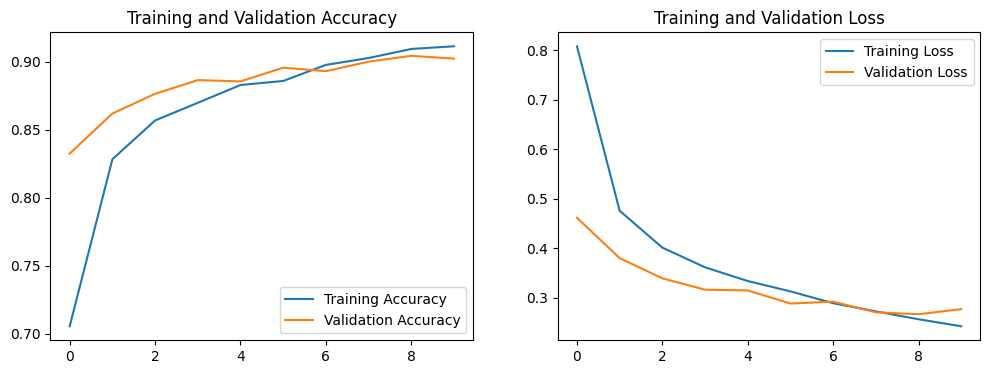

In [59]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

In [60]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val_enc)

563/563 [==============================] - 5s 9ms/step - loss: 0.2918 - accuracy: 0.8935


[0.2917911112308502, 0.8934999704360962]

In [61]:
# predicted values
y_pred_enc = model.predict(X_test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 [==============================] - 3s 9ms/step
[9.6189278e-01 4.3559576e-06 7.4610265e-04 3.5610150e-03 7.3375959e-05
 2.7985490e-07 3.3695728e-02 1.5615269e-07 2.5869937e-05 3.8721944e-07]
0


<ipython-input-63-700845fc753d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


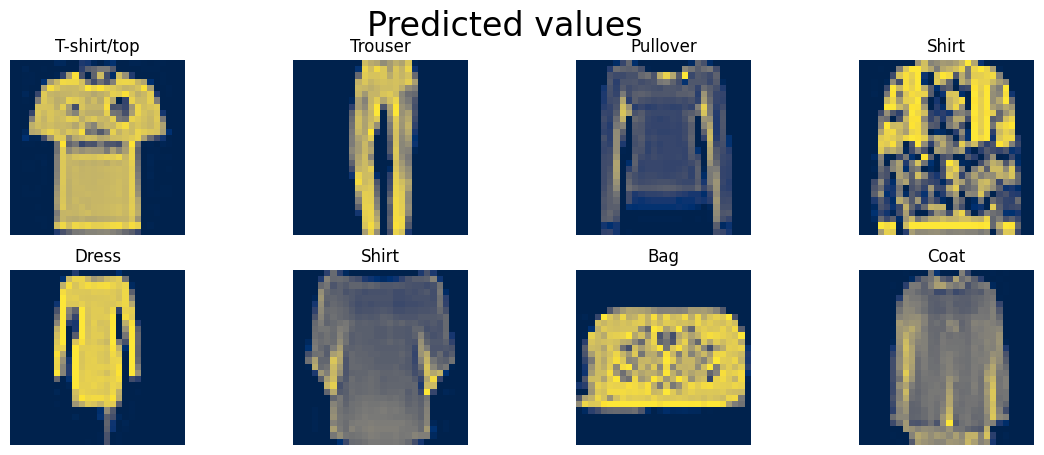

In [63]:
# predicted targets of each images
fig, ax = plt.subplots(figsize=(14, 5))
for ind, row in enumerate(X_test[:8]):
    plt.subplot(2, 4, ind+1)
    plt.title(item[y_pred[ind]])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.92      0.75      0.83      1000
           3       0.89      0.93      0.91      1000
           4       0.76      0.93      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.76      0.67      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



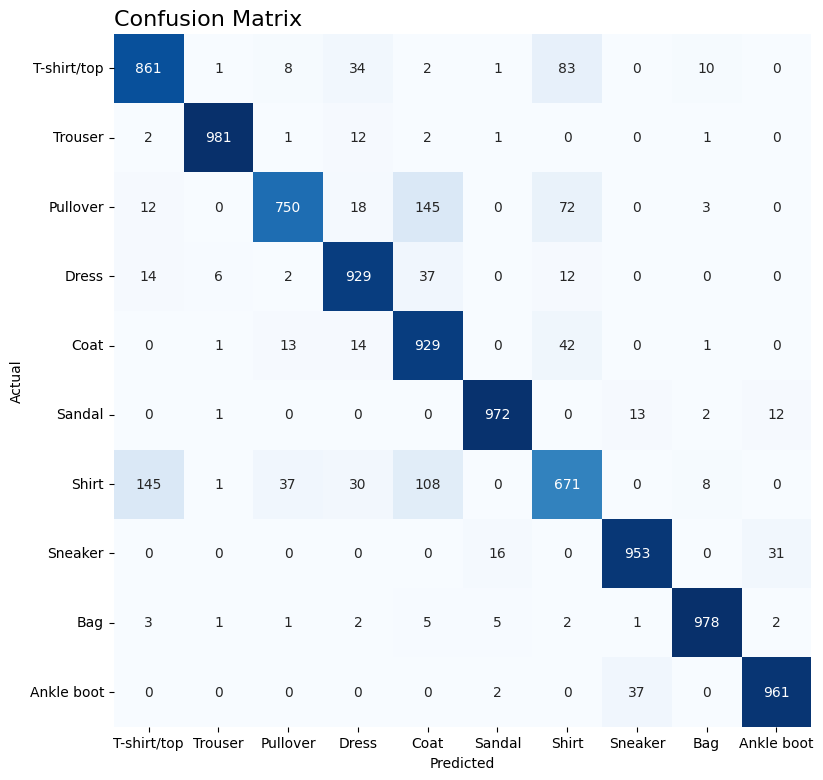

In [66]:
# y_pred_item = [item[i] for i in y_pred]
# y_test_item = [item[i] for i in y_test]

fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(item.values())
ax.set_yticklabels(item.values(), rotation=0)
plt.show()